## 컨텐츠 기반 추천 - 도서 추천
- 도서 요약, 작가, 장르 --> Feature 변환 --> 코사인 유사도

In [1]:
import numpy as np
import pandas as pd

#### 1. 데이터 탐색

In [2]:
df = pd.read_csv('data/books.csv')
df.head(3)

,Unnamed: 0.1,Desc,Unnamed: 0,author,genre,image_link,rating,title
0,0,We know that power is shifting: From West to E...,0.0,Moisés Naím,Business,https://i.gr-assets.com/images/S/compressed.ph...,3.63,The End of Power: From Boardrooms to Battlefie...
1,1,Following the success of The Accidental Billio...,1.0,Blake J. Harris,Business,https://i.gr-assets.com/images/S/compressed.ph...,3.94,"Console Wars: Sega, Nintendo, and the Battle t..."
2,2,How to tap the power of social software and ne...,2.0,Chris Brogan,Business,https://i.gr-assets.com/images/S/compressed.ph...,3.78,Trust Agents: Using the Web to Build Influence...


In [3]:
df.drop(columns=['Unnamed: 0.1','Unnamed: 0'], inplace=True)
df.head(3)

,Desc,author,genre,image_link,rating,title
0,We know that power is shifting: From West to E...,Moisés Naím,Business,https://i.gr-assets.com/images/S/compressed.ph...,3.63,The End of Power: From Boardrooms to Battlefie...
1,Following the success of The Accidental Billio...,Blake J. Harris,Business,https://i.gr-assets.com/images/S/compressed.ph...,3.94,"Console Wars: Sega, Nintendo, and the Battle t..."
2,How to tap the power of social software and ne...,Chris Brogan,Business,https://i.gr-assets.com/images/S/compressed.ph...,3.78,Trust Agents: Using the Web to Build Influence...


In [4]:
df.shape

(2382, 6)

In [5]:
print(df.Desc[0])

We know that power is shifting: From West to East and North to South, from presidential palaces to public squares, from once formidable corporate behemoths to nimble startups and, slowly but surely, from men to women. But power is not merely shifting and dispersing. It is also decaying. Those in power today are more constrained in what they can do with it and more at risk of losing it than ever before. In The End of Power, award-winning columnist and former Foreign Policy editor Moisés Naím illuminates the struggle between once-dominant megaplayers and the new micropowers challenging them in every field of human endeavor. Drawing on provocative, original research, Naím shows how the antiestablishment drive of micropowers can topple tyrants, dislodge monopolies, and open remarkable new opportunities, but it can also lead to chaos and paralysis. Naím deftly covers the seismic changes underway in business, religion, education, within families, and in all matters of war and peace. Examples

#### 2. 데이터 전처리

In [6]:
# 결측치 확인
df.isna().sum().sum()

0

In [7]:
# 중복 데이터 확인
df.shape, df.title.nunique(), df.Desc.nunique()

((2382, 6), 2378, 2361)

In [8]:
# 중복 데이터 제거
df.drop_duplicates(subset=['title'], inplace=True)
df.drop_duplicates(subset=['Desc'], inplace=True)
df.shape

(2359, 6)

In [9]:
# 인덱스 정리
df.set_index('title', inplace=True)
df.reset_index(inplace=True)
df.tail(3)

,title,Desc,author,genre,image_link,rating
2356,The Day of the Triffids,In 1951 John Wyndham published his novel The D...,John Wyndham,Non-Fiction,https://i.gr-assets.com/images/S/compressed.ph...,4.02
2357,A Good Man is Hard to Find and Other Stories,This now classic book revealed Flannery O'Conn...,Flannery O'Connor,Non-Fiction,https://i.gr-assets.com/images/S/compressed.ph...,4.22
2358,Angela's Ashes,Imbued on every page with Frank McCourt's asto...,Frank McCourt,Non-Fiction,https://i.gr-assets.com/images/S/compressed.ph...,4.11


#### 3. Feature 변환

In [10]:
# 저자와 장르의 공백 제거
df.author = df.author.str.replace(' ', '')
df.genre = df.genre.str.replace(' ', '')

In [11]:
# 저자와 장르 필드는 강조
df['total'] = df.Desc + (' ' + df.author) * 3 + (' ' + df.genre) * 2
df.total[0]

"We know that power is shifting: From West to East and North to South, from presidential palaces to public squares, from once formidable corporate behemoths to nimble startups and, slowly but surely, from men to women. But power is not merely shifting and dispersing. It is also decaying. Those in power today are more constrained in what they can do with it and more at risk of losing it than ever before. In The End of Power, award-winning columnist and former Foreign Policy editor Moisés Naím illuminates the struggle between once-dominant megaplayers and the new micropowers challenging them in every field of human endeavor. Drawing on provocative, original research, Naím shows how the antiestablishment drive of micropowers can topple tyrants, dislodge monopolies, and open remarkable new opportunities, but it can also lead to chaos and paralysis. Naím deftly covers the seismic changes underway in business, religion, education, within families, and in all matters of war and peace. Example

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
cvect = CountVectorizer(stop_words='english')
total_cv = cvect.fit_transform(df.total)
total_cv.shape

(2359, 29146)

In [13]:
# 검색을 쉽게 하기 위한 시리즈
indices = pd.Series(df.index, index=df.title)

#### 4. 코사인 유사도

In [14]:
from sklearn.metrics.pairwise import cosine_similarity
cos_sim = cosine_similarity(total_cv)

In [18]:
# 0번 도서와 유사한 책 Top 5
s = pd.Series(cos_sim[0])
s.sort_values(ascending=False).head(6).tail(5)

334     0.389164
356     0.238000
960     0.232254
399     0.206002
1521    0.203349
dtype: float64

In [21]:
rec_books = s.sort_values(ascending=False).head(6).tail(5).index
df.title[rec_books]

334     The Intelligent Entrepreneur: How Three Harvar...
356     Bitter Brew: The Rise and Fall of Anheuser-Bus...
960                                   Conspiracy of Fools
399     How Women Rise: Break the 12 Habits Holding Yo...
1521                                            The Power
Name: title, dtype: object

In [22]:
def get_recommendation(title, cos_similarity):
    index = indices[title]
    sim_scores = pd.Series(cos_similarity[index])
    book_indices = sim_scores.sort_values(ascending=False).head(11).tail(10).index
    return df.title[book_indices]

In [23]:
df.title[1016]

'The Accidental Billionaires: The Founding of Facebook, a Tale of Sex, Money, Genius, and Betrayal'

In [25]:
get_recommendation(df.title[1016], cos_sim)

385    Reinventing You: Define Your Brand, Imagine Yo...
140    One Small Step Can Change Your Life: The Kaize...
430    Socialnomics: How Social Media Transforms the ...
910    The 1-Page Marketing Plan: Get New Customers, ...
438    The Big Switch: Rewiring the World, from Ediso...
348    Playing Big: Find Your Voice, Your Mission, Yo...
471    Ask a Manager: How to Navigate Clueless Collea...
42     Making It All Work: Winning at the Game of Wor...
553    The E-Myth Revisited: Why Most Small Businesse...
704    The Start-Up of You: Adapt to the Future, Inve...
Name: title, dtype: object

#### 5. 추천도서 이미지 출력

In [26]:
from PIL import Image
import matplotlib.pyplot as plt
import requests
from io import BytesIO

In [28]:
index = indices['The Da Vinci Code']
index

1181

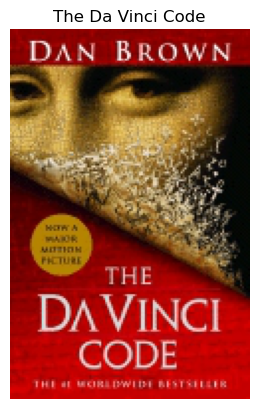

In [29]:
response = requests.get(df.image_link[index])
img = Image.open(BytesIO(response.content))
plt.imshow(img), plt.axis('off')
plt.title(df.title[index])
plt.show()

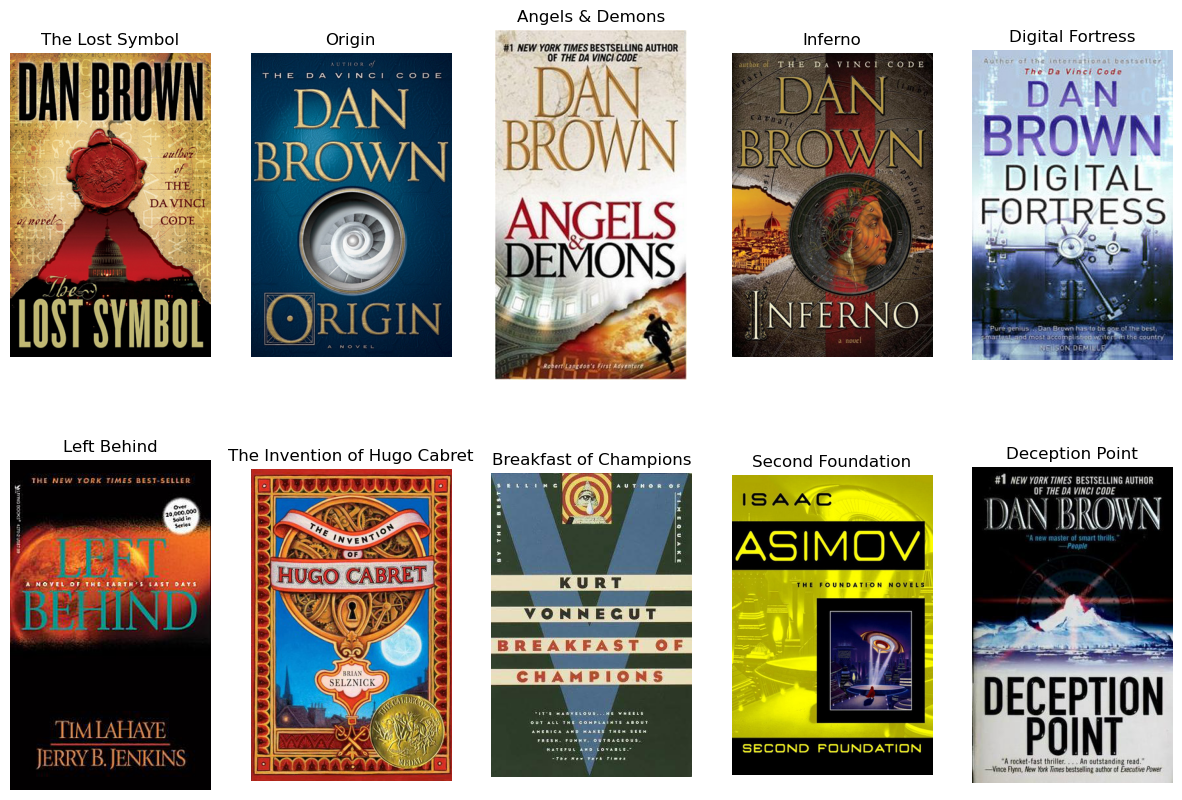

In [31]:
results = get_recommendation('The Da Vinci Code', cos_sim)
plt.figure(figsize=(15,10))
for i, index in enumerate(results.index):
    response = requests.get(df.image_link[index])
    img = Image.open(BytesIO(response.content))
    plt.subplot(2, 5, i+1)
    plt.imshow(img), plt.axis('off')
    plt.title(df.title[index])
plt.show()